In [1]:
import glob
import math

from DataClass import Data, MassData, Utils

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Import data

In [2]:
b_data = {'tone': [], 'spatial': []}

for _dir in glob.glob('/home/jaycee/workspace/data_processing/target_search/input/cleaned/blind/*/*/tone/*.csv.new') + \
    glob.glob('/home/jaycee/workspace/data_processing/target_search/input/cleaned/blind/*/*/spatial/*.csv.new'):
    key = _dir.split('/')[11]
    b_data[key].append(Data(_dir, key))

In [3]:
s_data = {'tone': [], 'spatial': []}

for _dir in glob.glob('/home/jaycee/workspace/data_processing/target_search/input/cleaned/sighted/*/*/tone/*.csv.new') + \
    glob.glob('/home/jaycee/workspace/data_processing/target_search/input/cleaned/sighted/*/*/spatial/*.csv.new'):
    key = _dir.split('/')[11]
    s_data[key].append(Data(_dir, key))

# Spatial

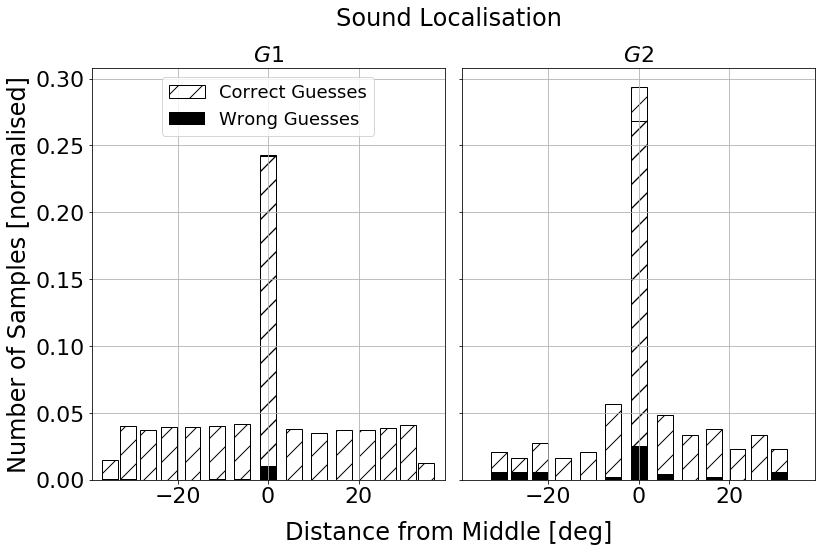

In [33]:
f, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 7))
f.add_subplot(111, frameon=False)

correct = {'4.0': 0, '2.0': 0, '1.0': 0, '0.5': 0, '0.25': 0, '0.125': 0, '0.0625': 0, '0.03125': 0,
           '-4.0': 0, '-2.0': 0, '-1.0': 0, '-0.5': 0, '-0.25': 0, '-0.125': 0, '-0.0625': 0, '-0.03125': 0}
wrong = {'4.0': 0, '2.0': 0, '1.0': 0, '0.5': 0, '0.25': 0, '0.125': 0, '0.0625': 0, '0.03125': 0,
         '-4.0': 0, '-2.0': 0, '-1.0': 0, '-0.5': 0, '-0.25': 0, '-0.125': 0, '-0.0625': 0, '-0.03125': 0}
tot = 0
for dset in s_data['spatial']:
    for i in range(len(dset.data['distance'])):
        tot += 1
        if dset.data['user'][i] == dset.data['correct'][i]:
            correct[str(dset.data['distance'][i])] += 1
        else:
            wrong[str(dset.data['distance'][i])] += 1
x = []
y = []
for i, j in correct.items():
    i = float(i)
    j = float(j)
    if i > 0:
        x.append(math.log(i/0.03125, 0.03125))
    else:
        x.append(-math.log(-i/0.03125, 0.03125))
    y.append(j)
ax[0].bar([math.degrees(math.atan2(i, 2.0)) for i in x], [i/tot for i in y], 3.5, color='green', label='Correct Guesses', fill=False, hatch='/')

# Plot incorrect 
x = []
y = []
for i, j in wrong.items():
    i = float(i)
    j = float(j)
    if i > 0:
        x.append(math.log(i/0.03125, 0.03125))
    else:
        x.append(-math.log(-i/0.03125, 0.03125))
    y.append(j)
ax[0].bar([math.degrees(math.atan2(i, 2.0)) for i in x], [i/tot for i in y], 3.5, color='k', label='Wrong Guesses')
ax[0].grid()
ax[0].set_ylabel('Number of Samples [normalised]', fontsize=24)
#ax[0].set_xlabel(r'Distance from Middle [deg]', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=22)
ax[0].set_title(r'$G1$', fontsize=22)

correct = {'4.0': 0, '2.0': 0, '1.0': 0, '0.5': 0, '0.25': 0, '0.125': 0, '0.0625': 0, '0.03125': 0,
           '-4.0': 0, '-2.0': 0, '-1.0': 0, '-0.5': 0, '-0.25': 0, '-0.125': 0, '-0.0625': 0, '-0.03125': 0}
wrong = {'4.0': 0, '2.0': 0, '1.0': 0, '0.5': 0, '0.25': 0, '0.125': 0, '0.0625': 0, '0.03125': 0,
         '-4.0': 0, '-2.0': 0, '-1.0': 0, '-0.5': 0, '-0.25': 0, '-0.125': 0, '-0.0625': 0, '-0.03125': 0}
mapping = {'4.0': '0.03125', '2.0': '0.0625', '1.0': '0.125', '0.5': '0.25', '0.25': '0.5', '0.125': '1.0',
           '0.0625': '2.0', '0.03125': 4.0, '-4.0': '-0.03125', '-2.0': '-0.0625', '-1.0': '-0.125', 
           '-0.5': '-0.25', '-0.25': '-0.5', '-0.125': '-1.0', '-0.0625': '-2.0', '-0.03125': '-4.0'}
tot = 0
for dset in b_data['spatial']:
    for i in range(len(dset.data['distance'])):
        tot += 1
        if dset.data['user'][i] == dset.data['correct'][i]:
            correct[mapping[str(dset.data['distance'][i])]] += 1
        else:
            wrong[mapping[str(dset.data['distance'][i])]] += 1
x = []
y = []
for i, j in correct.items():
    i = float(i)
    j = float(j)
    if i > 0:
        x.append(math.log(i/0.03125, 0.03125))
    else:
        x.append(-math.log(-i/0.03125, 0.03125))
    y.append(j)
    
ax[1].bar([math.degrees(math.atan2(i, 2.0)) for i in x], [i/tot for i in y], 3.5, color='green', fill=False, hatch='/')

# Plot incorrect 
x = []
y = []
for i, j in wrong.items():
    i = float(i)
    j = float(j)
    if i > 0:
        x.append(math.log(i/0.03125, 0.03125))
    else:
        x.append(-math.log(-i/0.03125, 0.03125))
    y.append(j)
ax[1].bar([math.degrees(math.atan2(i, 2.0)) for i in x], [i/tot for i in y], 3.5, color='k')
ax[1].grid()
#ax[1].set_xlabel(r'Distance from Middle [deg]', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=22)
ax[1].set_xlim([-39, 39])
ax[1].set_title(r'$G2$', fontsize=22)

ax[0].legend(fontsize=18, loc=9)
f.tight_layout()
f.text(0.55, -0.01, 'Distance from Middle [deg]', ha='center', fontsize=24)
f.text(0.55, 1.01, 'Sound Localisation', ha='center', fontsize=24)

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.show()

# Tone

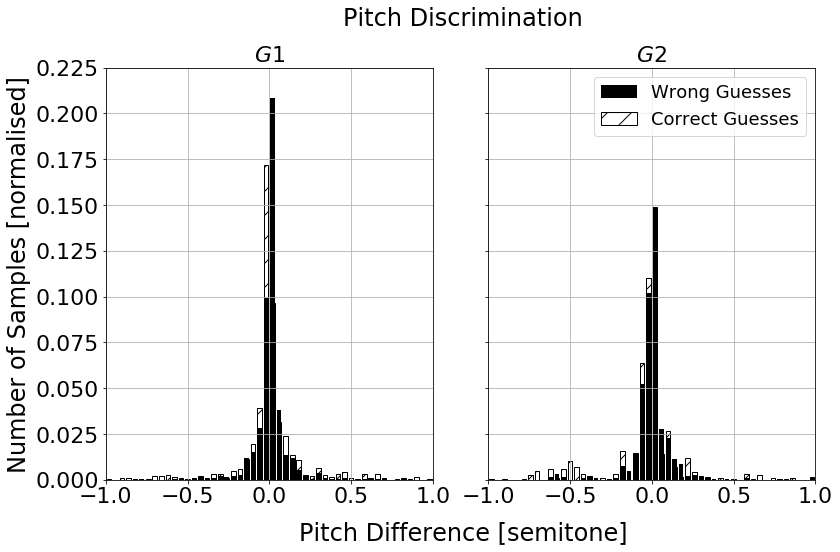

In [44]:
f, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 7))
f.add_subplot(111, frameon=False)

correct = {}
wrong = {}

correct_l = []
wrong_l = []
for dset in s_data['tone']:
    code = dset.file.split('/')[10]
    correct[code] = []
    wrong[code] = []
    for i in range(len(dset.data['first_tone'])):
        if dset.data['correct'][i] == dset.data['user'][i]:
            correct[code].append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
            correct_l.append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
        else:
            wrong[code].append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
            wrong_l.append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)

bins = np.arange(-20, 20, 0.04)
width = 0.7 * (bins[1] - bins[0])
centre = (bins[:-1] + bins[1:]) / 2

chist, _ = np.histogram(correct_l, bins)
whist, _ = np.histogram(wrong_l, bins)

chist = chist.astype(np.float64)
whist = whist.astype(np.float64)

hsum = np.sum(chist) + np.sum(whist)
for i in range(len(chist)):
    norm = (chist[i] + whist[i]) / hsum
    if norm > 0:
        chist[i] *= norm
        whist[i] *= norm

hsum = np.sum(chist) + np.sum(whist)
chist /= hsum
whist /= hsum
ax[0].bar(centre, whist, align='center', width=width, fill=True, label='Wrong Guesses', color='k')
ax[0].bar(centre, chist, align='center', width=width, fill=False, hatch='/', label='Correct Guesses')
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([0.0, 0.225])
#plt.legend(fontsize=34)
#ax[0].set_xlabel('Pitch Difference [semitone]', fontsize=24)
ax[0].set_ylabel('Number of Samples [normalised]', fontsize=24)
ax[0].grid()
ax[0].set_title(r'$G1$', fontsize=22)
ax[0].tick_params(axis='both', which='major', labelsize=22)

correct = {}
wrong = {}

correct_l = []
wrong_l = []
for dset in b_data['tone']:
    code = dset.file.split('/')[10]
    correct[code] = []
    wrong[code] = []
    for i in range(len(dset.data['first_tone'])):
        if dset.data['correct'][i] == dset.data['user'][i]:
            correct[code].append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
            correct_l.append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
        else:
            wrong[code].append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)
            wrong_l.append(np.log2(dset.data['first_tone'][i] / dset.data['second_tone'][i]) * 12)

bins = np.arange(-20, 20, 0.04)
width = 0.7 * (bins[1] - bins[0])
centre = (bins[:-1] + bins[1:]) / 2

chist, _ = np.histogram(correct_l, bins)
whist, _ = np.histogram(wrong_l, bins)

chist = chist.astype(np.float64)
whist = whist.astype(np.float64)

hsum = np.sum(chist) + np.sum(whist)
for i in range(len(chist)):
    norm = (chist[i] + whist[i]) / hsum
    if norm > 0:
        chist[i] *= norm
        whist[i] *= norm

hsum = np.sum(chist) + np.sum(whist)
chist /= hsum
whist /= hsum
ax[1].bar(centre, whist, align='center', width=width, fill=True, label='Wrong Guesses', color='k')
ax[1].bar(centre, chist, align='center', width=width, fill=False, hatch='/', label='Correct Guesses')
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([0.0, 0.225])
ax[1].legend(fontsize=18)
#ax[1].set_xlabel('Pitch Difference [semitone]', fontsize=24)
#ax[1].set_ylabel('Number of Samples [normalised]', fontsize=24)
ax[1].grid()
ax[1].set_title(r'$G2$', fontsize=22)
ax[1].tick_params(axis='both', which='major', labelsize=22)

f.text(0.55, -0.01, 'Pitch Difference [semitone]', ha='center', fontsize=24)
f.text(0.55, 1.01, 'Pitch Discrimination', ha='center', fontsize=24)

f.tight_layout()
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.show()

/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jaycee/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parame

0.3506489946182825 0.5379423928121815


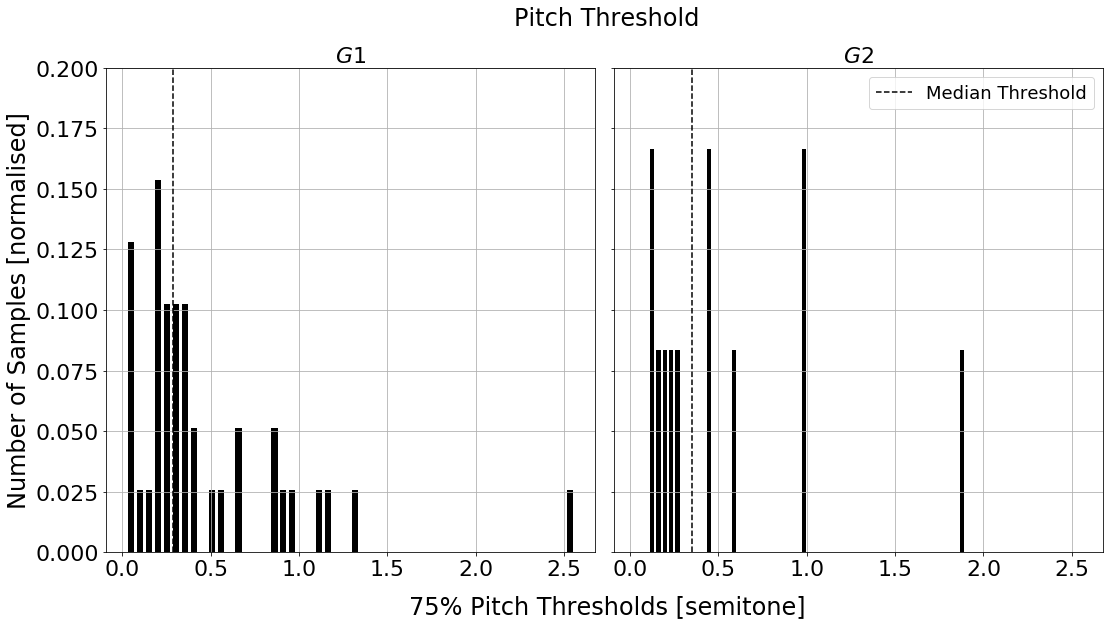

In [48]:
f, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(16, 8))
f.add_subplot(111, frameon=False)

# Generate cdf
correct = {}
wrong = {}

correct_l = []
wrong_l = []
for dset in s_data['tone']:
    code = dset.file.split('/')[10]
    correct[code] = []
    wrong[code] = []
    for i in range(len(dset.data['first_tone'])):
        if dset.data['correct'][i] == dset.data['user'][i]:
            correct[code].append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i]) * 12)
            correct_l.append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i]) * 12)
        else:
            wrong[code].append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i])*12)
            wrong_l.append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i])*12)
thresholds = []
for code in correct.keys():
    sample = np.abs(np.array(correct[code])).astype(np.float64)
    if len(correct[code]) > 0:
        step = 0.5#20 / 400
        bins = np.arange(0, 10, step)
        hist, _ = np.histogram(sample, bins)
        t = np.linspace(0, 10, 1000)
        centre = (bins[:-1] + bins[1:]) / 2
        #print(np.cumsum(hist/np.sum(hist)))
        mu, sigma = sp.optimize.curve_fit(sp.stats.foldnorm.cdf, centre, np.cumsum(hist/np.sum(hist)), p0=[1, -1])[0]
        p25 = sp.stats.foldnorm.ppf(0.25, mu, sigma)
        #print(mu, sigma, p25)
        thresholds.append(np.abs(p25))

        width = 0.7 * (bins[1] - bins[0])

mu, sigma, med = np.average(thresholds), np.std(thresholds), np.median(thresholds)
c95 = sp.stats.norm.interval(0.95, loc=mu, scale=sigma)
hist, bins = np.histogram(thresholds, bins=50)

width = 0.7 * (bins[1] - bins[0])
centre = (bins[:-1] + bins[1:]) / 2

ax[0].bar(centre, [i / sum(hist) for i in hist], align='center', width=width, color='k')
ax[0].plot([med, med], [0, 0.3], 'k--', label='Median Threshold')
#ax[0].legend(fontsize=18)
#ax[0].set_xlabel('75% Sound Thresholds [semitone]', fontsize=24)
ax[0].set_ylabel('Number of Samples [normalised]', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=22)
#plt.xlim([0, 2.6])
ax[0].set_ylim([0, 0.3])
ax[0].grid()
ax[0].set_title(r'$G1$', fontsize=22)

# Generate cdf
correct = {}
wrong = {}

correct_l = []
wrong_l = []
for dset in b_data['tone']:
    code = dset.file.split('/')[10]
    correct[code] = []
    wrong[code] = []
    for i in range(len(dset.data['first_tone'])):
        if dset.data['correct'][i] == dset.data['user'][i]:
            correct[code].append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i]) * 12)
            correct_l.append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i]) * 12)
        else:
            wrong[code].append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i])*12)
            wrong_l.append(np.log2(dset.data['first_tone'][i]/dset.data['second_tone'][i])*12)
thresholds = []
for code in correct.keys():
    sample = np.abs(np.array(correct[code])).astype(np.float64)
    if len(correct[code]) > 0:
        step = 0.5#20 / 400
        bins = np.arange(0, 10, step)
        hist, _ = np.histogram(sample, bins)
        t = np.linspace(0, 10, 1000)
        centre = (bins[:-1] + bins[1:]) / 2
        #print(np.cumsum(hist/np.sum(hist)))
        mu, sigma = sp.optimize.curve_fit(sp.stats.foldnorm.cdf, centre, np.cumsum(hist/np.sum(hist)), p0=[1, -1])[0]
        p25 = sp.stats.foldnorm.ppf(0.25, mu, sigma)
        #print(mu, sigma, p25)
        thresholds.append(np.abs(p25))

        width = 0.7 * (bins[1] - bins[0])

mu, sigma, med = np.average(thresholds), np.std(thresholds), np.median(thresholds)
c95 = sp.stats.norm.interval(0.95, loc=mu, scale=sigma)
print(med, mu)

hist, bins = np.histogram(thresholds, bins=50)

width = 0.7 * (bins[1] - bins[0])
centre = (bins[:-1] + bins[1:]) / 2

ax[1].bar(centre, [i / sum(hist) for i in hist], align='center', width=width, color='k')
ax[1].plot([med, med], [0, 0.3], 'k--', label='Median Threshold')
ax[1].legend(fontsize=18)
#ax[1].set_xlabel('75% Sound Thresholds [semitone]', fontsize=24)
#ax[1].set_ylabel('Number of Samples [normalised]', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=22)
#plt.xlim([0, 2.6])
ax[1].set_ylim([0, 0.2])
ax[1].grid()
ax[1].set_title(r'$G2$', fontsize=22)

f.text(0.55, -0.01, '75% Pitch Thresholds [semitone]', ha='center', fontsize=24)
f.text(0.55, 1.01, 'Pitch Threshold', ha='center', fontsize=24)

f.tight_layout()
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.show()